# Quantium Virtual Internship - Retail Strategy and Analytics

In [1]:
import pandas as pd

In [2]:
#Opening datasets
QVI_purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")
QVI_transaction_data = pd.read_csv("QVI_transaction_data.csv")

Checking basic info about each column 

In [3]:
QVI_purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
QVI_purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
QVI_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
QVI_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
#Converting date to datetime format
import datetime
#QVI_transaction_data["DATETIME"] = datetime.datetime.strptime(QVI_transaction_data["DATE"], '%m/%d/%y')

QVI_transaction_data['DATETIME'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(QVI_transaction_data['DATE'],
                                                                                  unit='D')

QVI_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATETIME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


This code assumes that the date values in the 'DATE' column of the 'QVI_transaction_data' dataframe are in the format of number of days since December 30, 1899, which is the same as the format used in Excel. The code converts these values to datetime format by adding a timedelta to the origin date of December 30, 1899.

In [8]:
#PROD_NAME summary
QVI_transaction_data['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [9]:
#Lower all characters in PROD_NAME column

QVI_transaction_data['PROD_NAME_analysis'] = QVI_transaction_data['PROD_NAME'].str.lower()

Removing special characters and digits in string column:

In [10]:
QVI_transaction_data['PROD_NAME_analysis'] = QVI_transaction_data['PROD_NAME_analysis'].str.replace(r'[^a-zA-Z\s]|\d', '', regex=True)

Removing all salsa products, as analysis should include only chips category

In [11]:
# Dropping product names with "salsa"
QVI_transaction_data = QVI_transaction_data[QVI_transaction_data["PROD_NAME_analysis"].str.contains("salsa") == False]

Performing basic text analysis by summarizing individual words in 'PROD_NAME' column

In [12]:
PROD_NAME_indiv_words = (
    QVI_transaction_data['PROD_NAME_analysis'].str.get_dummies(' ').sum()
    .rename('PROD_NAME').reset_index(name='count')
    .sort_values('count', ascending=False, ignore_index=True)
)

In [13]:
PROD_NAME_indiv_words.head(30)

,index,count
0,g,236262
1,chips,49770
2,kettle,41288
3,salt,27976
4,cheese,27890
5,smiths,27390
6,pringles,25102
7,crinkle,22490
8,corn,22063
9,doritos,22041


In [14]:
#checking summary statistics such as mean, min and max values for each feature 
#to see if there are any obvious outliers in the data and if there are any nulls in any of the columns 
QVI_transaction_data.describe()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,43464.054875,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,105.396691,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,43373.000000,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,43464.000000,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [15]:
QVI_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DATE                246742 non-null  int64         
 1   STORE_NBR           246742 non-null  int64         
 2   LYLTY_CARD_NBR      246742 non-null  int64         
 3   TXN_ID              246742 non-null  int64         
 4   PROD_NBR            246742 non-null  int64         
 5   PROD_NAME           246742 non-null  object        
 6   PROD_QTY            246742 non-null  int64         
 7   TOT_SALES           246742 non-null  float64       
 8   DATETIME            246742 non-null  datetime64[ns]
 9   PROD_NAME_analysis  246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.7+ MB


<b>Product quantity ['PROD_QTY'] appears to have an outlier which should be investigated further. Checking the case where 200 packets of chips are bought in one transaction:</b>

In [16]:
QVI_transaction_data[QVI_transaction_data["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATETIME,PROD_NAME_analysis
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19,dorito corn chp supreme g
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20,dorito corn chp supreme g


<b>Checking other transactions of the client who made above transactions:</b>

In [17]:
QVI_transaction_data[QVI_transaction_data["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATETIME,PROD_NAME_analysis
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19,dorito corn chp supreme g
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20,dorito corn chp supreme g


In [18]:
# Removing the above client transactions from dataset:
QVI_transaction_data = QVI_transaction_data[QVI_transaction_data["LYLTY_CARD_NBR"] != 226000]

In [19]:
#Re-checking transaction data
QVI_transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,43464.054843,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,105.396396,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,43373.000000,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,43464.000000,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


## Count the number of transactions by date

In [20]:
#a summary of transaction count by date.
trans_count_date = QVI_transaction_data.groupby("DATETIME")['TXN_ID'].count()
trans_count_date

DATETIME
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: TXN_ID, Length: 364, dtype: int64

There are 364 days included, so one is missing. Creating additional list of dates for plots.

In [21]:
from datetime import date, timedelta

sdate = date(2018,7,1)   # start date
edate = date(2019,7,1)   # end date

dates_df = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
dates_df = pd.DataFrame(dates_df, columns=['DATETIME'])
dates_df

,DATETIME
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [22]:
#Merging two dataframes
dates_df = dates_df.merge(trans_count_date, on='DATETIME', how='left')

dates_df['TXN_ID_x'] = dates_df['TXN_ID'].fillna(0)


<AxesSubplot:xlabel='DATETIME'>

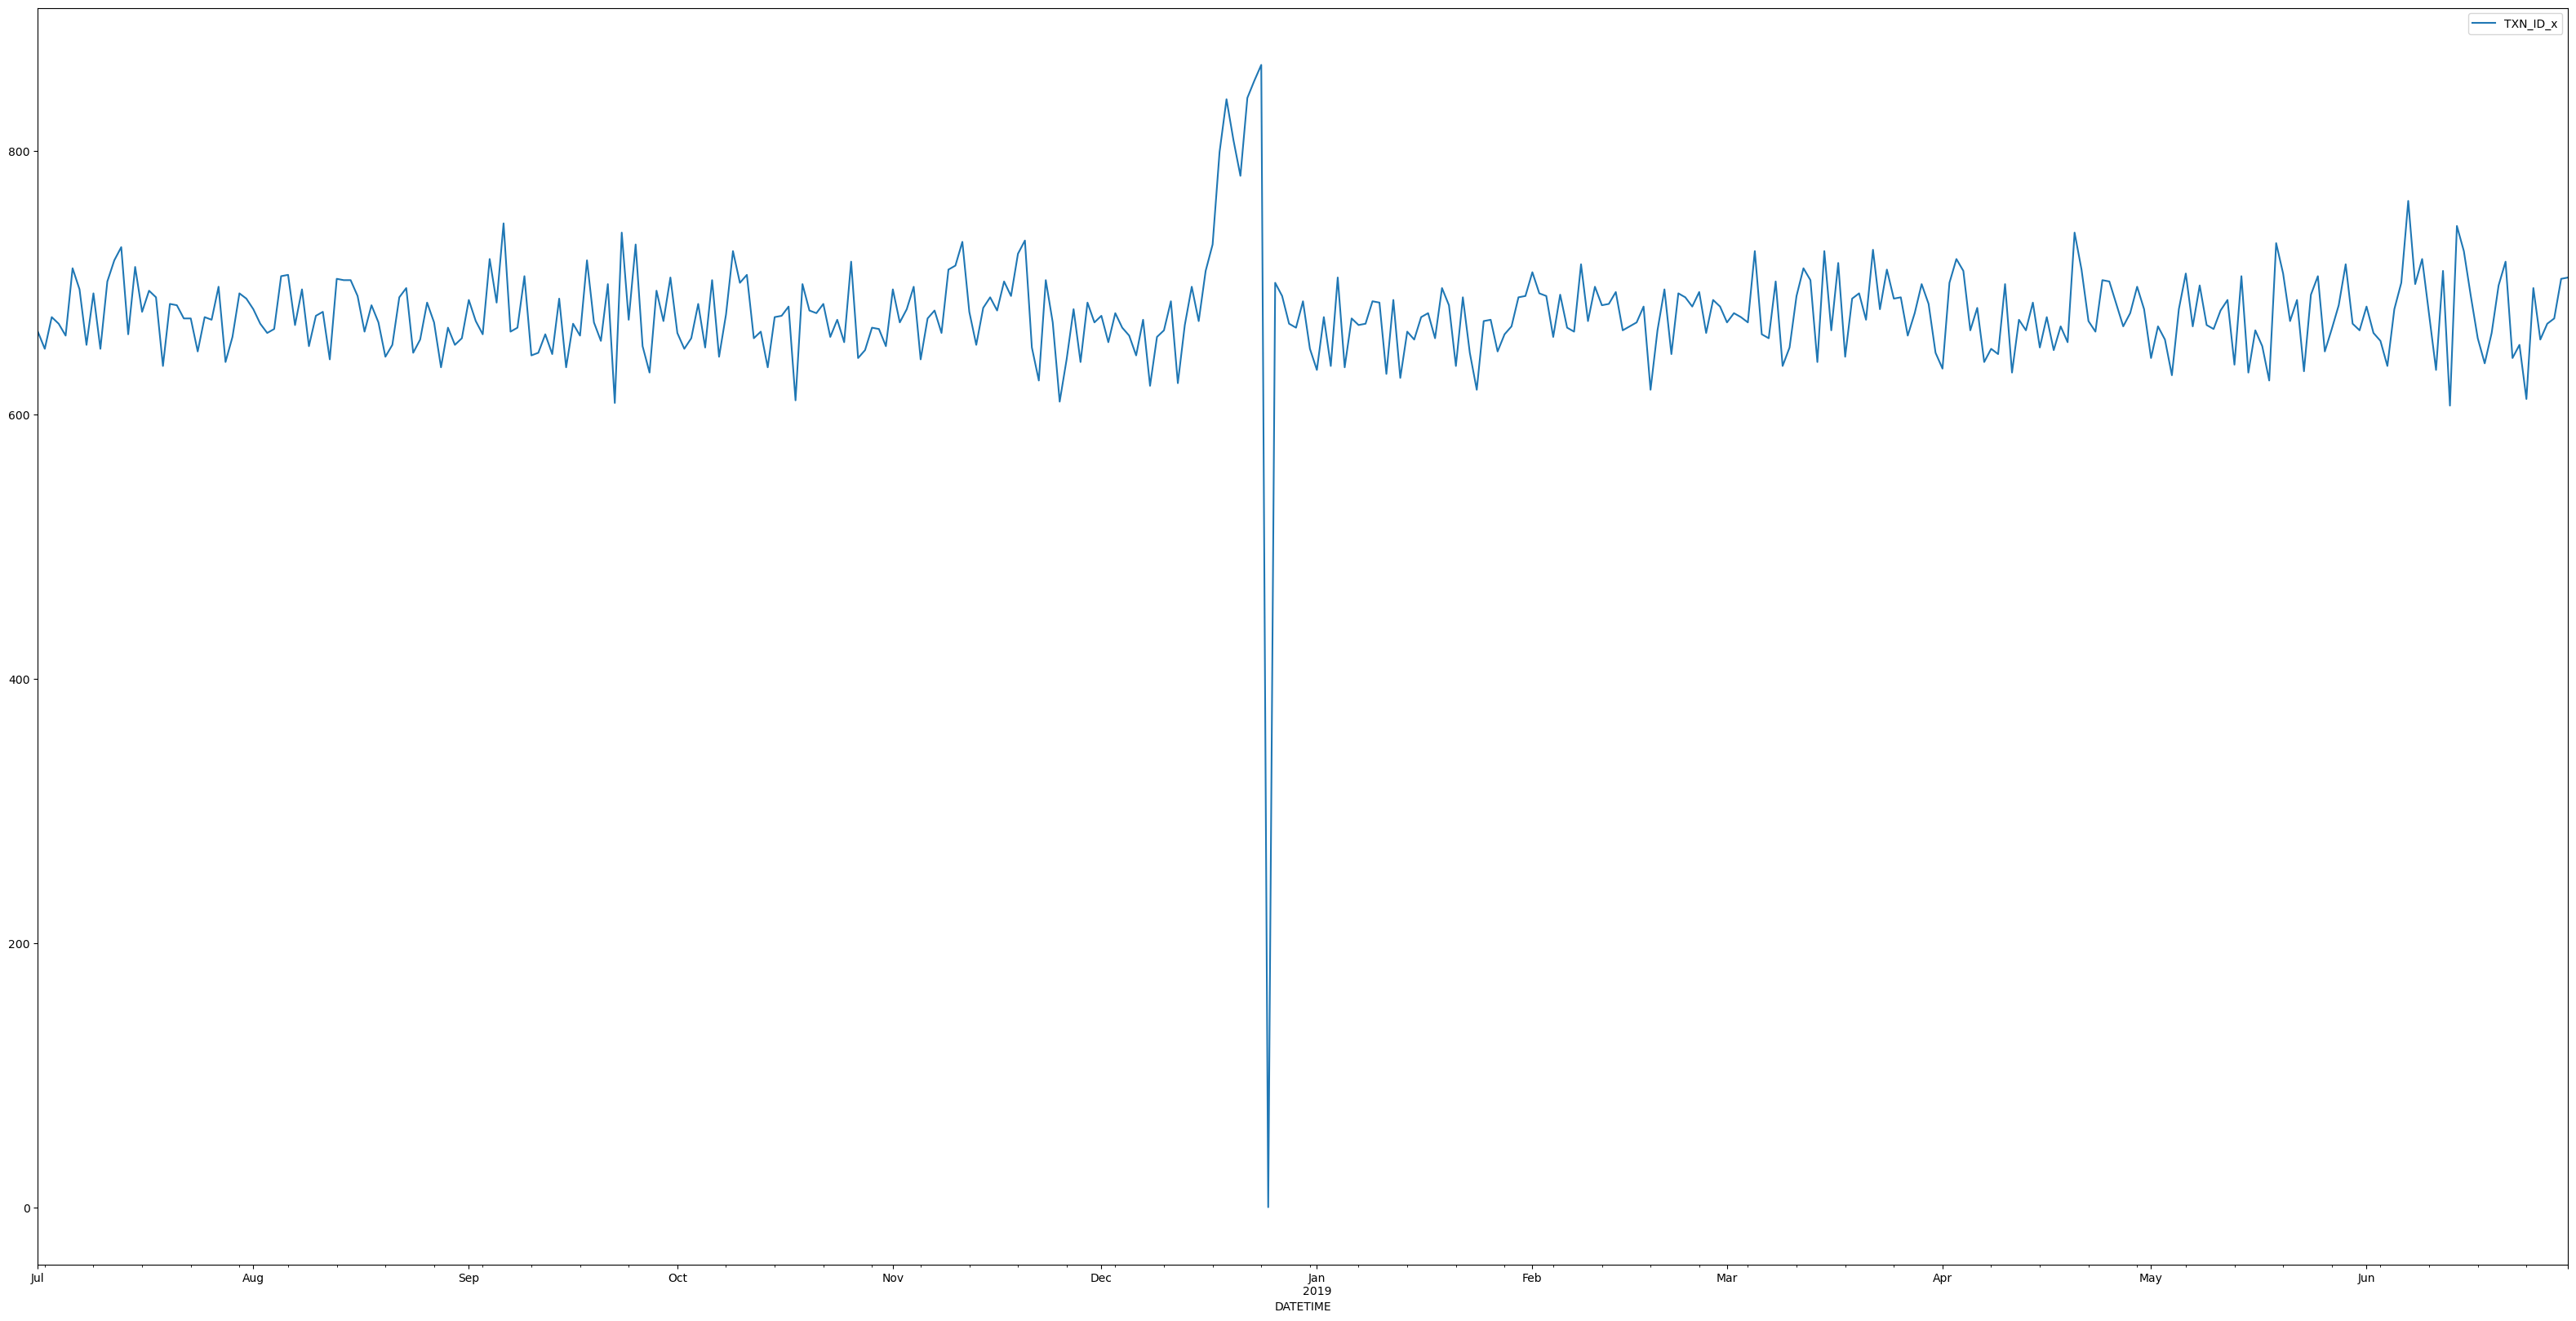

In [23]:
#Visual representation of transaction count for each day
dates_df.plot(x='DATETIME', y='TXN_ID_x', figsize=(40, 20))

We can see that there is an increase in purchases in December and a break in late
December.

<b>Filtering to December and looking at individual days:</b>

In [24]:
#Dataframe with December data only
december_data = dates_df[
    (dates_df["DATETIME"] >= '2018-12-01') & (dates_df["DATETIME"] < '2019-01-01')
]


<AxesSubplot:xlabel='DATETIME'>

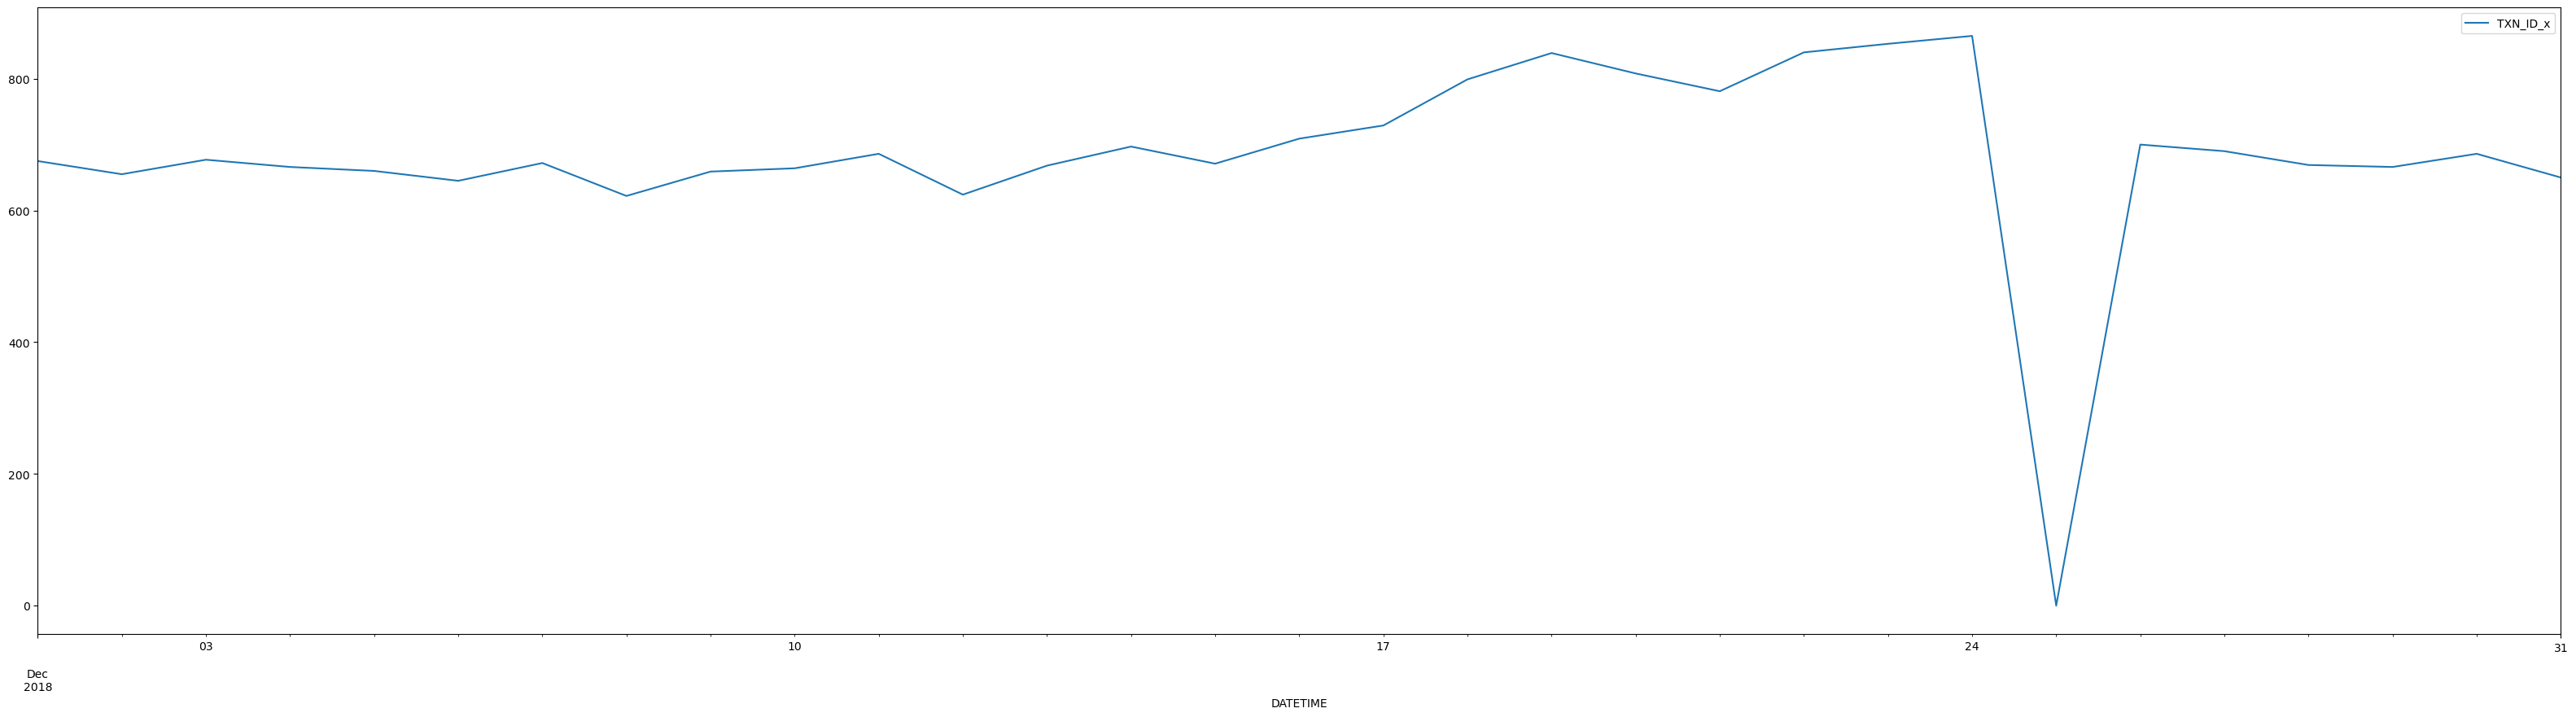

In [25]:
#Visual representation of transaction count for each day in DECEMBER
december_data.plot(x='DATETIME', y='TXN_ID_x', figsize=(40, 10))

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

### Pack size

Taking the digits that are in PROD_NAME:

In [26]:
QVI_transaction_data['PACK_SIZE'] = QVI_transaction_data['PROD_NAME'].str.extract('(\d+)').astype(int)


In [27]:
QVI_transaction_data['PACK_SIZE'].describe()

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

<AxesSubplot:>

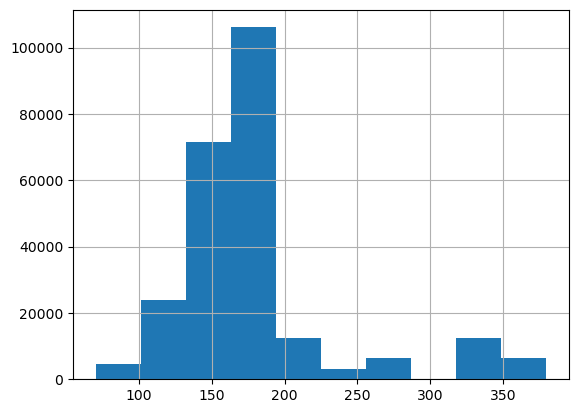

In [28]:
#histogram showing the number of transactions by pack size
QVI_transaction_data['PACK_SIZE'].hist()

### Brands

In [29]:
QVI_transaction_data['BRAND_NAMES'] = QVI_transaction_data['PROD_NAME'].str.split().str[0].str.strip().astype(str)
QVI_transaction_data['BRAND_NAMES'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAMES, dtype: int64

In [30]:
#Cleaning brand names

QVI_transaction_data['BRAND_NAMES'].replace({'Red':'RRD',#Red to RRD
             'Grain':'GrnWves',#Grain to GrnWves
             'Natural':'NCC',#Natural to NCC
             'Infzns':'Infuzions',#Infzns to Infizions
             'Dorito':'Doritos',#Dorito to Doritos
             'Smith':'Smiths',#Smith to Smiths
             'Snbts':'Sunbites'}, inplace=True)#Snbts to Sunbites
QVI_transaction_data['BRAND_NAMES'].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
NCC            7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
Woolworths     1516
French         1418
Name: BRAND_NAMES, dtype: int64

### Examining customer data

In [31]:
QVI_purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
#Merging customer data to QVI_transaction_data

QVI_transaction_data = QVI_transaction_data.merge(QVI_purchase_behaviour, on='LYLTY_CARD_NBR')
QVI_transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATETIME,PROD_NAME_analysis,PACK_SIZE,BRAND_NAMES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,natural chip compny seasaltg,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,ccs nacho cheese g,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,ww original stacked chips g,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,ccs original g,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,smiths crinkle cut chips chicken g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,kettle sweet chilli and sour cream g,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,tostitos splash of lime g,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,doritos mexicana g,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,doritos corn chip mexican jalapeno g,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [33]:
#Checking if some customers are not matched

check = QVI_purchase_behaviour.merge(QVI_transaction_data[['LYLTY_CARD_NBR', 'TXN_ID']], on='LYLTY_CARD_NBR')
check.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
TXN_ID              0
dtype: int64

In [34]:
#Saving dataframe for Task 2
QVI_transaction_data.to_csv('QVI_transaction_data_task_2.csv')

## Data analysis on customer segments

Calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales

In [35]:
tot_sales = QVI_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
tot_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


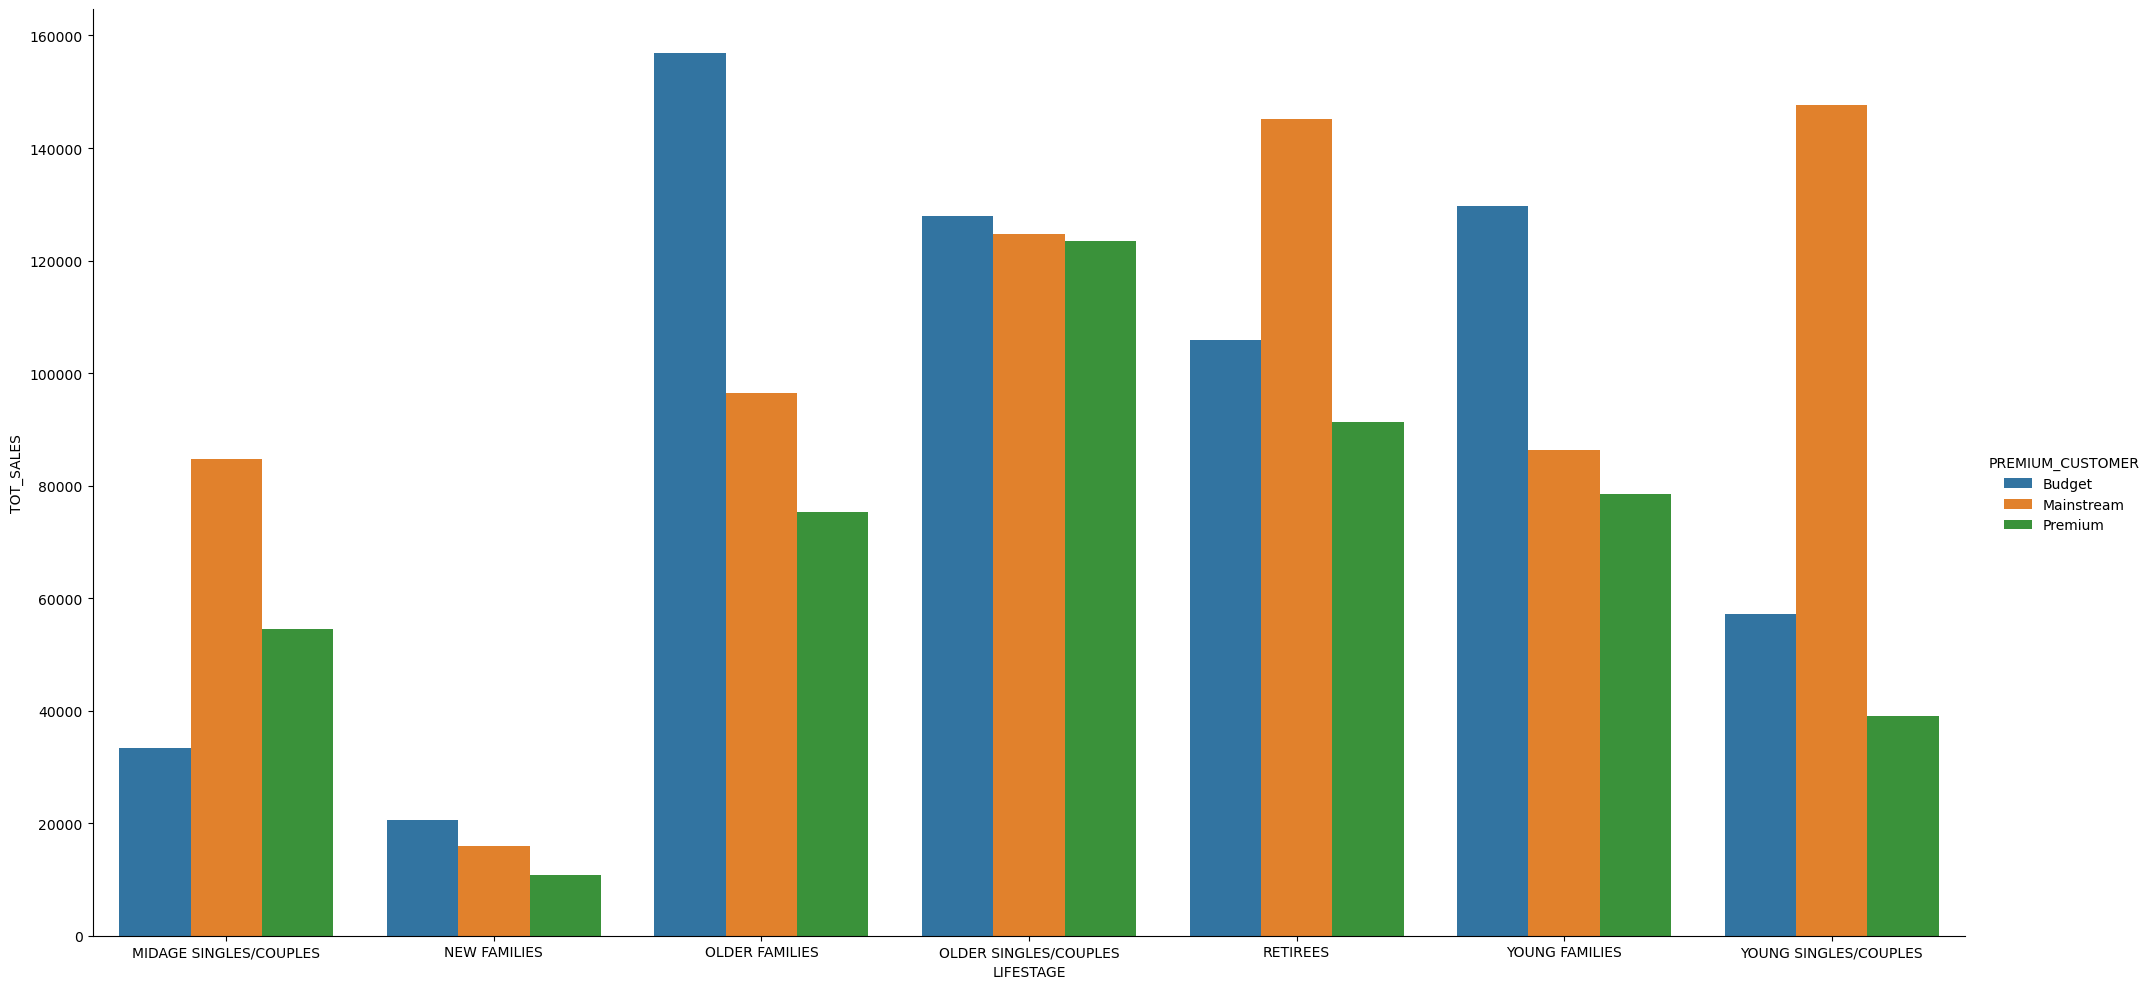

In [36]:
import seaborn as sns
sns.catplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=tot_sales, kind='bar', height=10, aspect=2)

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees

#### Quantity per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [37]:
chips_qty = QVI_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
chips_qty

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,8883
1,MIDAGE SINGLES/COUPLES,Mainstream,21213
2,MIDAGE SINGLES/COUPLES,Premium,14400
3,NEW FAMILIES,Budget,5241
4,NEW FAMILIES,Mainstream,4060
5,NEW FAMILIES,Premium,2769
6,OLDER FAMILIES,Budget,41853
7,OLDER FAMILIES,Mainstream,25804
8,OLDER FAMILIES,Premium,20239
9,OLDER SINGLES/COUPLES,Budget,32883


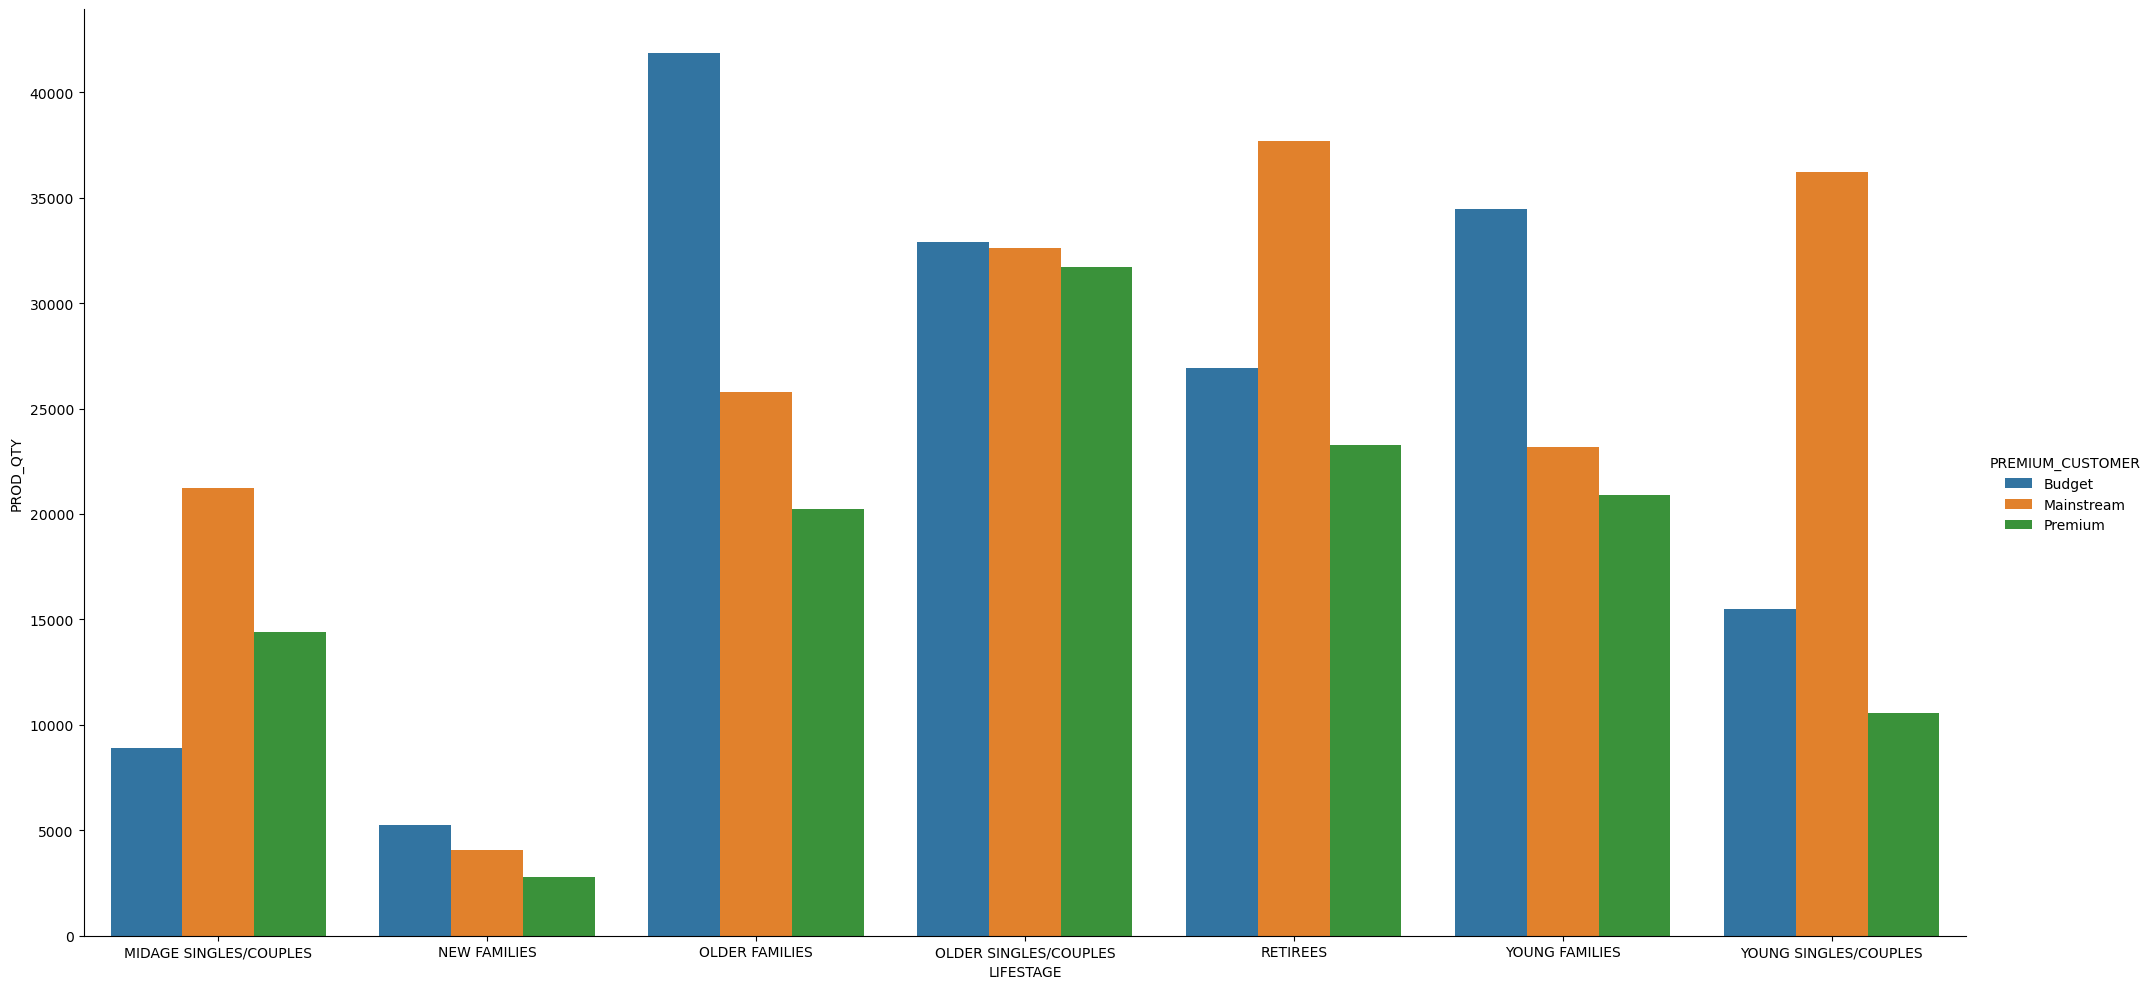

In [38]:
sns.catplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=chips_qty, kind='bar', height=10, aspect=2)

#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [39]:
no_cust = QVI_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
no_cust

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


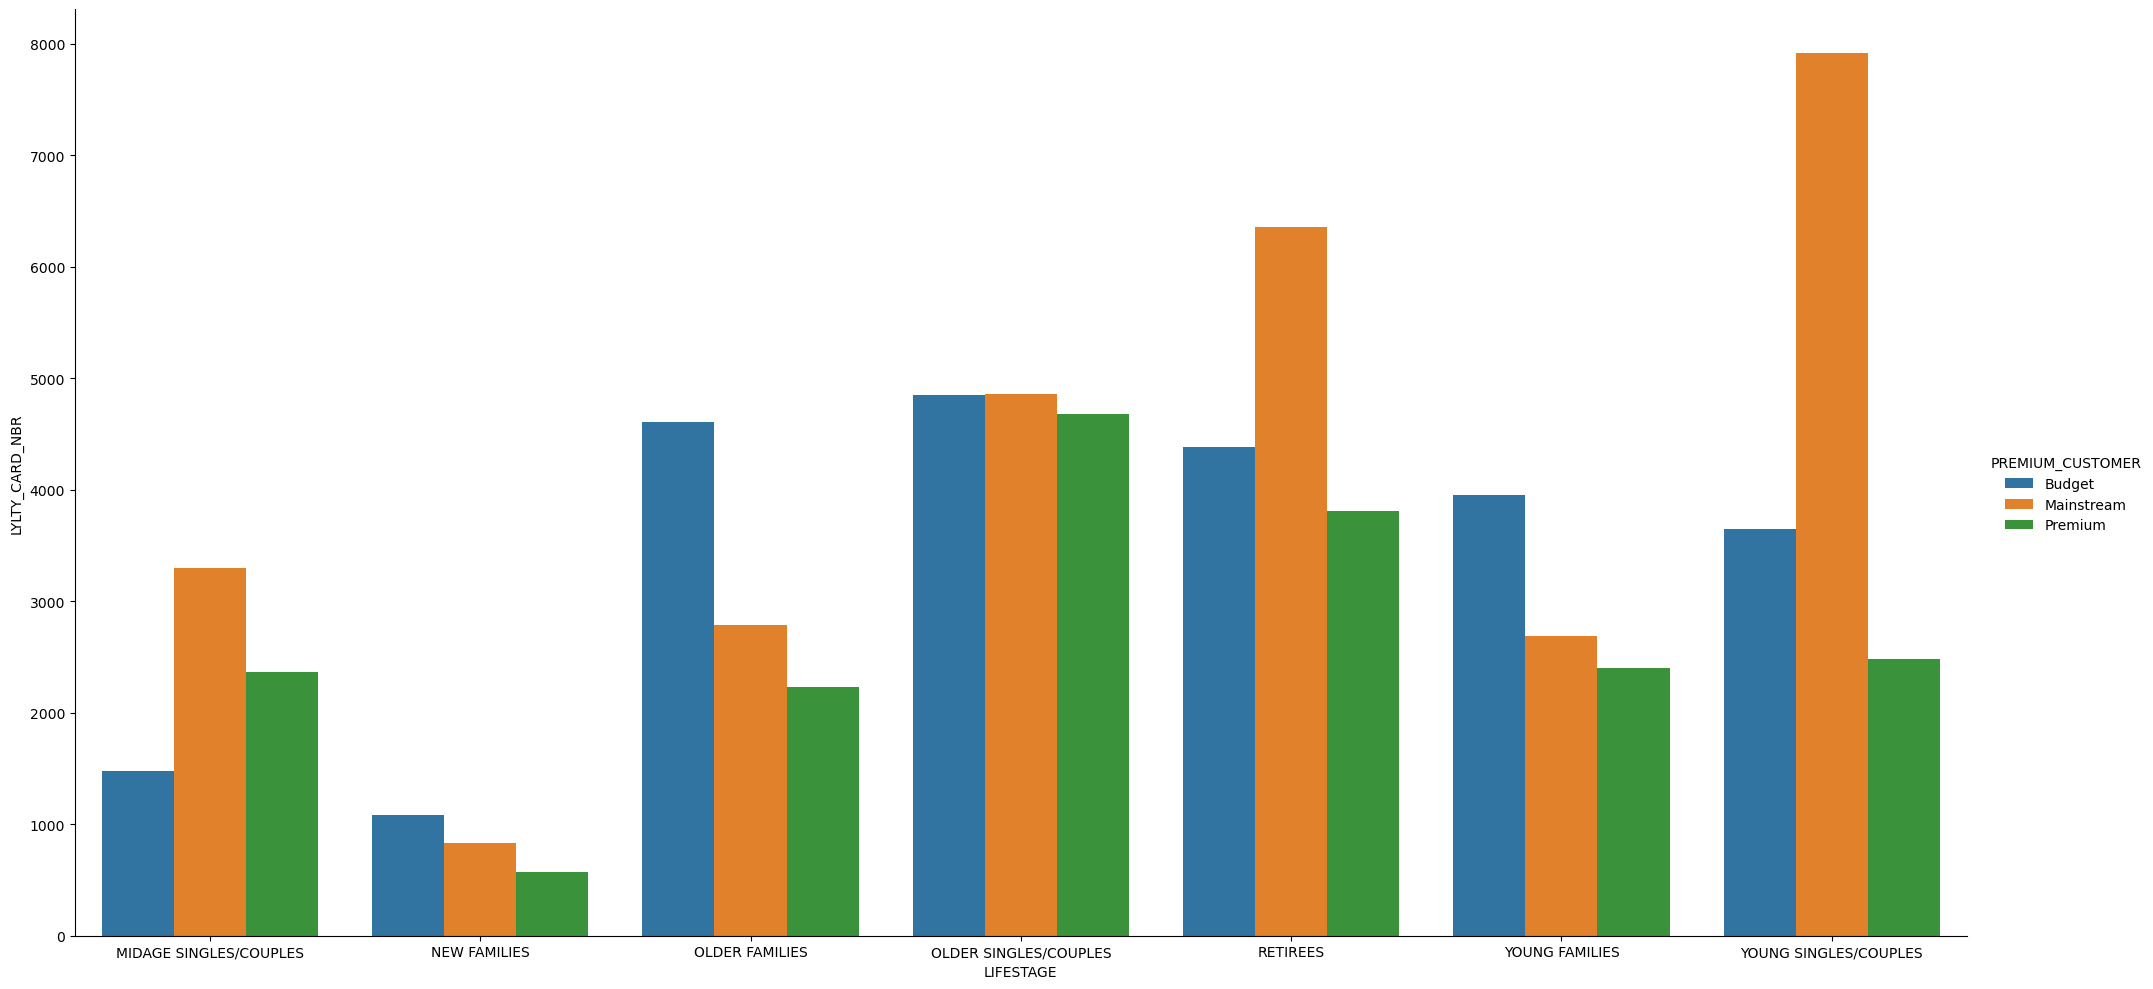

In [40]:
sns.catplot(x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', data=no_cust, kind='bar', height=10, aspect=2)

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer.

#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [41]:
avg_qty = QVI_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
avg_qty

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,1.893626
1,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
2,MIDAGE SINGLES/COUPLES,Premium,1.891750
3,NEW FAMILIES,Budget,1.855878
4,NEW FAMILIES,Mainstream,1.858124
5,NEW FAMILIES,Premium,1.860887
6,OLDER FAMILIES,Budget,1.945384
7,OLDER FAMILIES,Mainstream,1.948795
8,OLDER FAMILIES,Premium,1.945496
9,OLDER SINGLES/COUPLES,Budget,1.914920


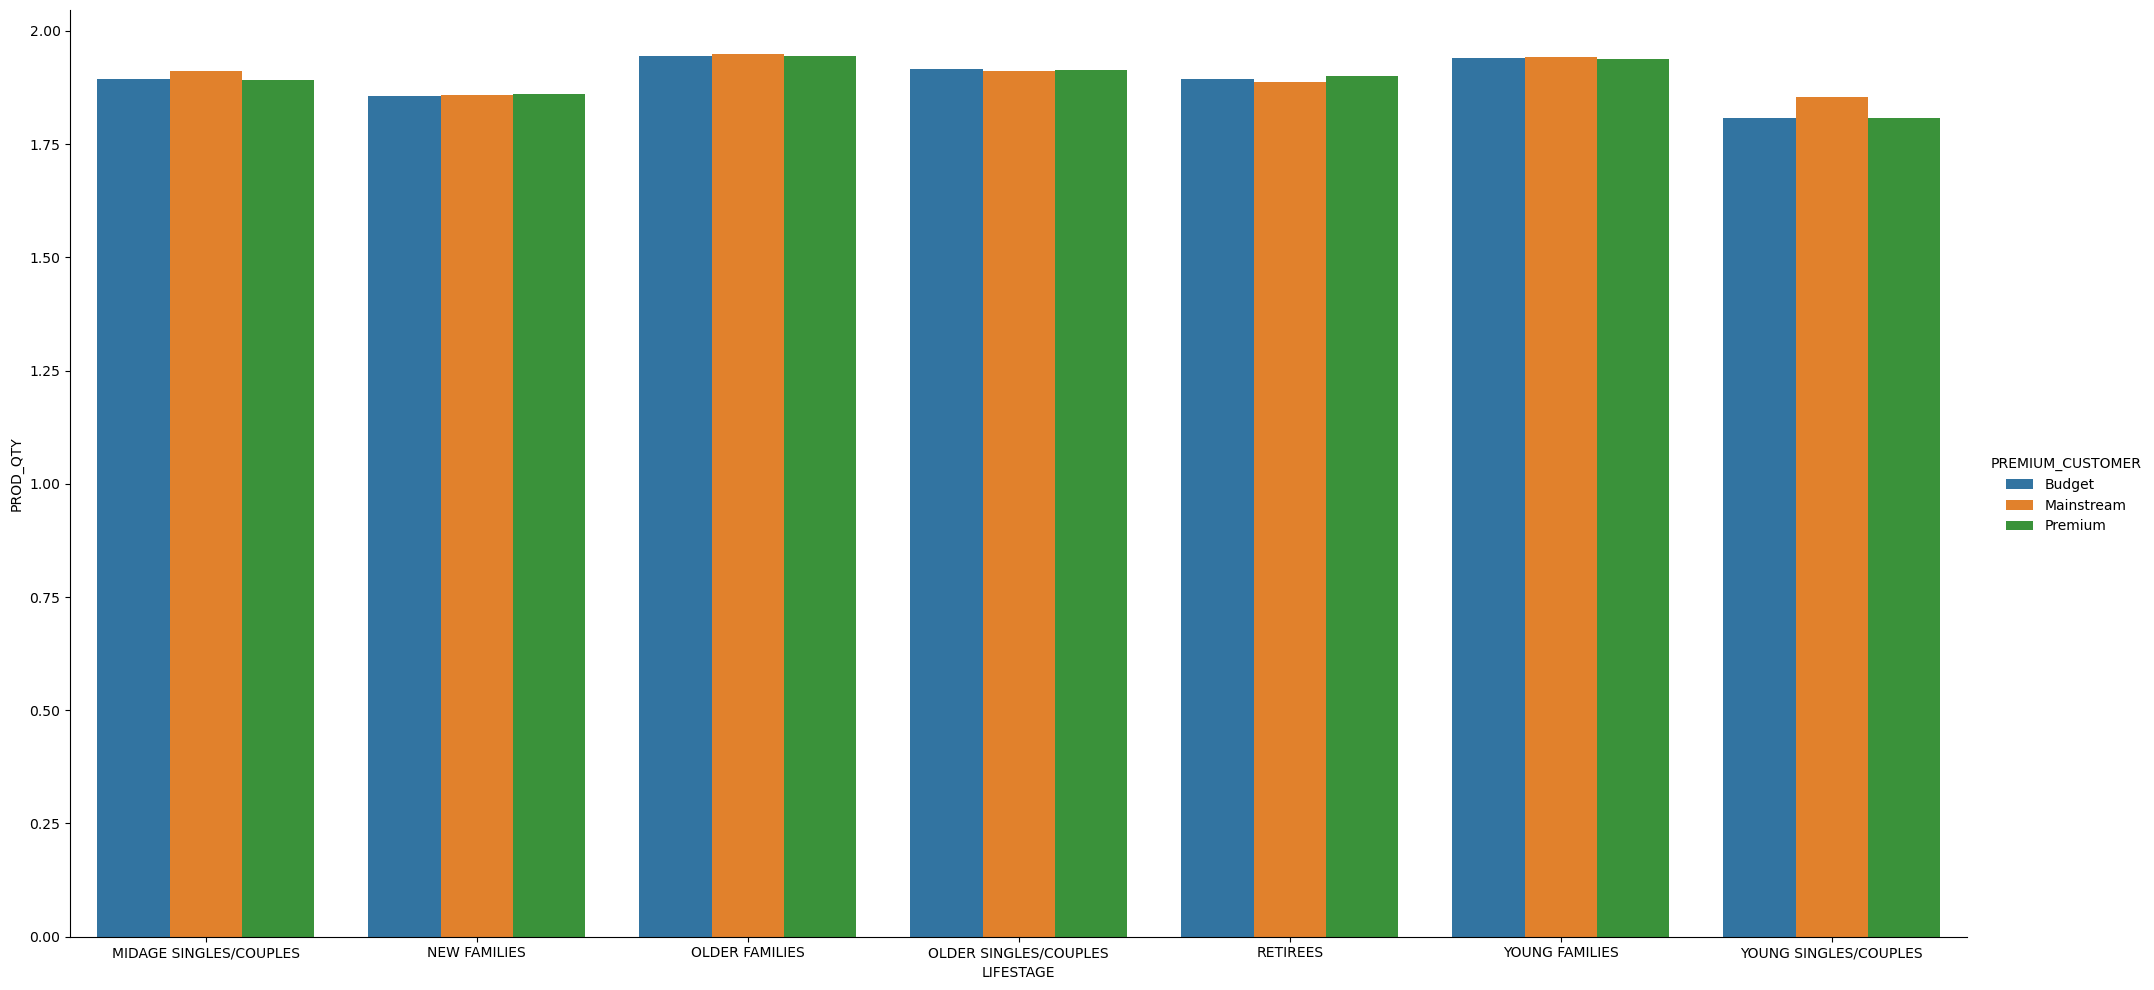

In [42]:
sns.catplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_qty, kind='bar', height=10, aspect=2)

Older families and young families in general buy more chips per customer

#### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [43]:
QVI_transaction_data['AVG_UNIT_PRICE'] = QVI_transaction_data['TOT_SALES'] / QVI_transaction_data['PROD_QTY']
avg_unit_price = QVI_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVG_UNIT_PRICE'].mean().reset_index()
avg_unit_price

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_UNIT_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


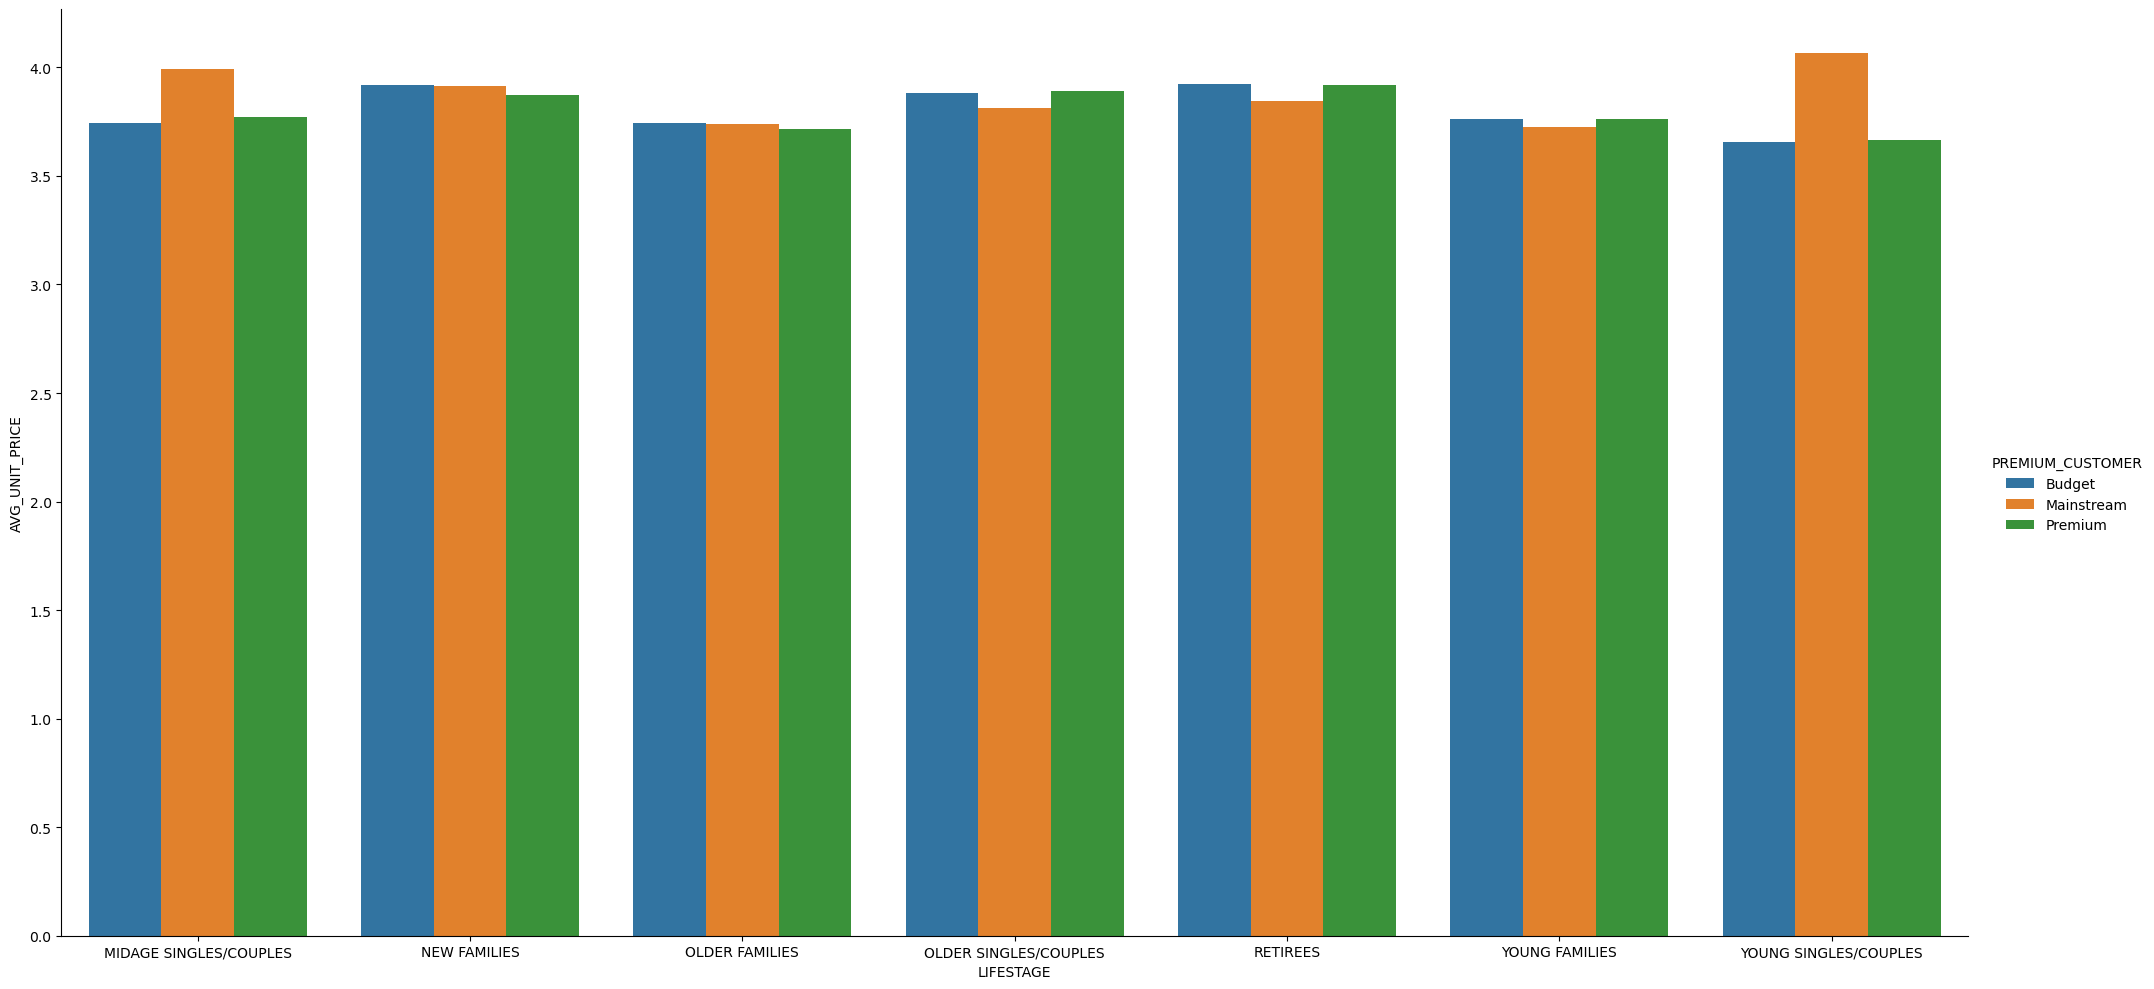

In [44]:
sns.catplot(x='LIFESTAGE', y='AVG_UNIT_PRICE', hue='PREMIUM_CUSTOMER', data=avg_unit_price, kind='bar', height=10, aspect=2)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

#### Performing an independent t-test between mainstream vs premium and budget midage and young singles and couples

The t-test results in a p-value of XXXXXXX, i.e. the unit price for mainstream, young and mid-age singles and couples [ARE / ARE NOT] significantly higher than that of budget or premium, young and midage singles and couples.

In [45]:
df = QVI_transaction_data[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_UNIT_PRICE']]
df = df[(df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

In [46]:
# df_1 - mainstream, young and mid-age singles and couples
# df_2 - budget or premium, young and midage singles and couples

df_1 = df[df['PREMIUM_CUSTOMER'] == 'Mainstream']
df_2 = df[df['PREMIUM_CUSTOMER'] != 'Mainstream']

In [47]:
from scipy import stats

In [48]:
stats.ttest_ind(df_1.AVG_UNIT_PRICE, df_2.AVG_UNIT_PRICE)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

the unit price for mainstream, young and mid-age singles and couples <b>ARE</b> significantly higher than that of budget or premium, young and midage singles and couples.

#### Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

In [49]:
brand_buy = QVI_transaction_data[(QVI_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') 
                                 & (QVI_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

In [50]:
grouped_brands = brand_buy.groupby('BRAND_NAMES')['PROD_QTY'].sum().sort_values(ascending=False)
grouped_brands

BRAND_NAMES
Kettle        7172
Doritos       4447
Pringles      4326
Smiths        3491
Infuzions     2343
Thins         2187
Twisties      1673
Tostitos      1645
Cobs          1617
RRD           1587
GrnWves       1185
Tyrrells      1143
WW             770
NCC            710
Cheezels       651
CCs            405
Cheetos        291
Sunbites       230
French         143
Burger         106
Woolworths     103
Name: PROD_QTY, dtype: int64

<AxesSubplot:xlabel='BRAND_NAMES'>

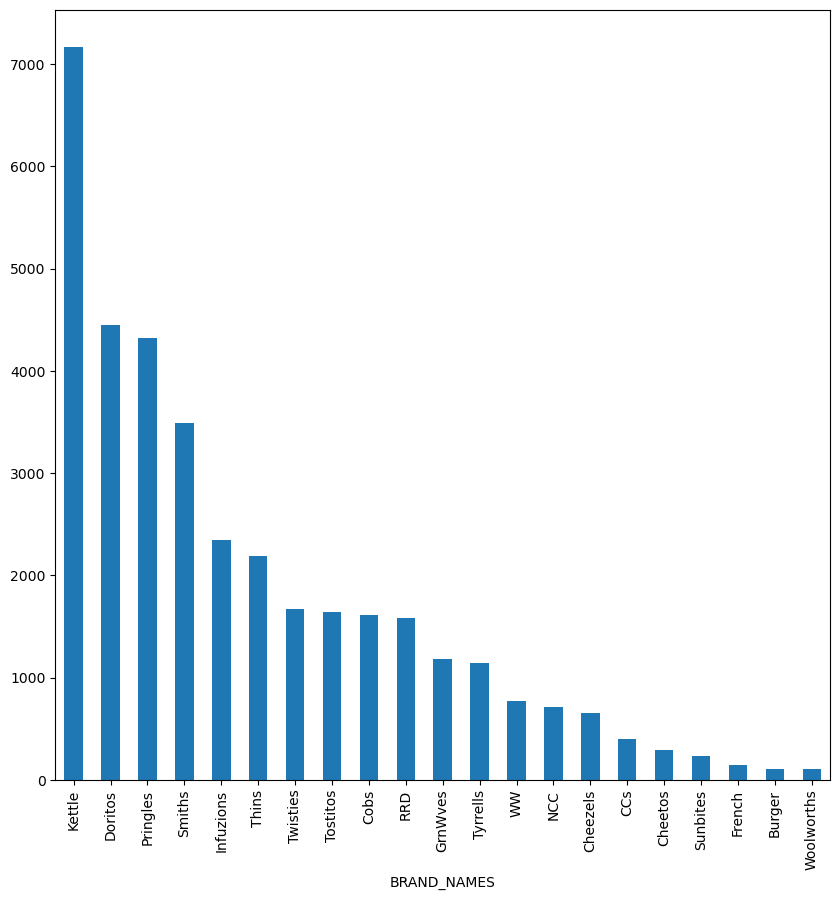

In [51]:
grouped_brands.plot.bar(figsize=(10, 10))

#### Deep dive into Mainstream, young singles/couples

Separating transactions for Mainstream, young singles/couples

In [52]:
mybasket = (QVI_transaction_data[(QVI_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
                                 & (QVI_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
            .groupby(['LYLTY_CARD_NBR', 'BRAND_NAMES'])['PROD_QTY'].sum().unstack().reset_index()
            .fillna(0).set_index('LYLTY_CARD_NBR'))
mybasket

BRAND_NAMES,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,GrnWves,Infuzions,Kettle,...,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [53]:
#Converting all positive values to 1 and nagative to 0
def covert_values(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

In [54]:
    
mybasket = mybasket.applymap(covert_values) #Apply a function to a Dataframe elementwise
mybasket

BRAND_NAMES,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,GrnWves,Infuzions,Kettle,...,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1002,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1010,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1018,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1060,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2330041,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2330321,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Training model:

In [55]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [66]:
my_frequent_itemset = apriori(mybasket, min_support=0.07, use_colnames=True)

In [67]:
a_rules = association_rules(my_frequent_itemset, metric="lift", min_threshold=0.7)
a_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kettle),(Doritos),0.387142,0.260326,0.089933,0.232300,0.892344,-0.010850,0.963494
1,(Doritos),(Kettle),0.260326,0.387142,0.089933,0.345463,0.892344,-0.010850,0.936324
2,(Kettle),(Pringles),0.387142,0.256158,0.091449,0.236215,0.922148,-0.007720,0.973890
3,(Pringles),(Kettle),0.256158,0.387142,0.091449,0.357002,0.922148,-0.007720,0.953126
4,(Kettle),(Smiths),0.387142,0.202476,0.075660,0.195432,0.965214,-0.002727,0.991246
5,(Smiths),(Kettle),0.202476,0.387142,0.075660,0.373674,0.965214,-0.002727,0.978498


Making recomendations

In [78]:
mybasket[(mybasket['Doritos'] == True) & (mybasket['Kettle'] == True)]['Doritos'].count()

712

In [80]:
mybasket[(mybasket['Pringles'] == True) & (mybasket['Kettle'] == True)]['Doritos'].count()

724

In [84]:
mybasket[(mybasket['Smiths'] == True) & (mybasket['Kettle'] == True)]['Doritos'].count()

599

In [91]:
mybasket[['Kettle', 'Doritos', 'Pringles', 'Smiths']].sum()

BRAND_NAMES
Kettle      3065
Doritos     2061
Pringles    2028
Smiths      1603
dtype: int64

We can see that in case of 'Mainstream, young singles/couples' customer segment, there are 4 most popular Brands od chips: Kettle, Doritos, Pringles and Smiths. They are very often bought together.

<b>Checking preferable package size for 'Mainstream, young singles/couples' customer segment </b>

In [93]:
grouped_sizes = brand_buy.groupby('PACK_SIZE')['PROD_QTY'].sum().sort_values(ascending=False)
grouped_sizes

PACK_SIZE
175    9237
150    5709
134    4326
110    3850
170    2926
330    2220
165    2016
380    1165
270    1153
210    1055
135     535
250     520
200     325
190     271
160     232
90      230
180     130
70      110
125     109
220     106
Name: PROD_QTY, dtype: int64

<AxesSubplot:xlabel='PACK_SIZE'>

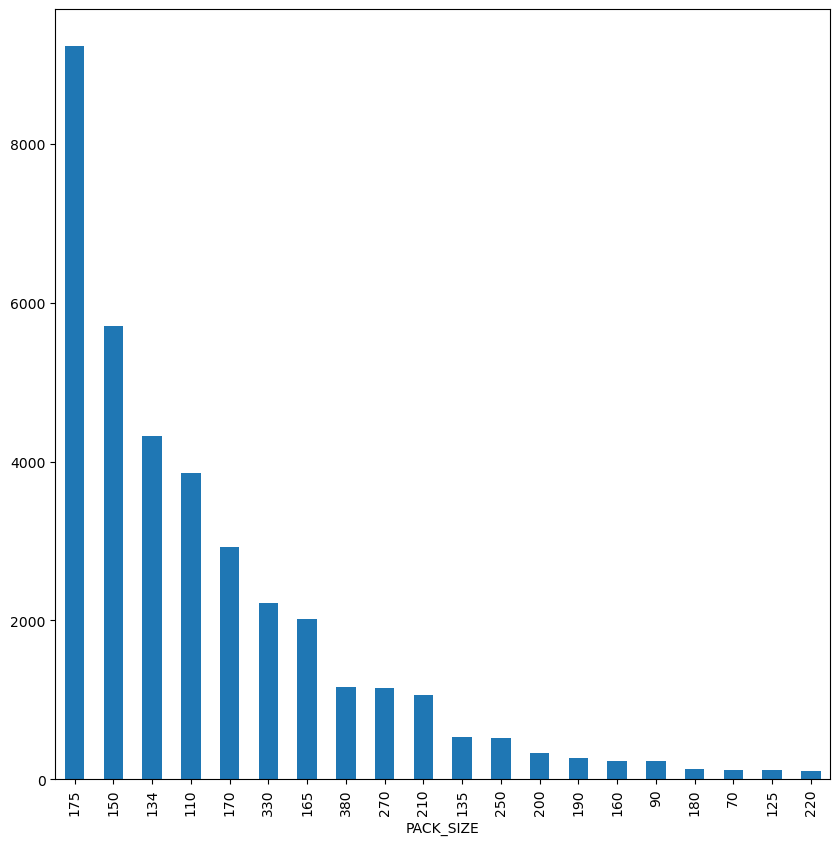

In [94]:
grouped_sizes.plot.bar(figsize=(10, 10))